In [26]:
import requests

In [27]:
import os
from dotenv import load_dotenv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
co2 = pd.read_csv("./co2.csv")

In [29]:
url = "https://www.iqair.com/air-pollution-data-api"

In [30]:
response = requests.get(url)

In [31]:
response.status_code

200

In [32]:
parameters = {"city": "Mumbai", "state": "Maharashtra", "country": "India", "key": "319014af-8d98-4260-91dc-6a965181f050"}

In [33]:
url_latest = "http://api.airvisual.com/v2/city?"

In [34]:
response = requests.get(url = url_latest, params = parameters)

In [35]:
response.status_code

200

In [36]:
response.json()

{'status': 'success',
 'data': {'city': 'Mumbai',
  'state': 'Maharashtra',
  'country': 'India',
  'location': {'type': 'Point', 'coordinates': [72.88261, 19.07283]},
  'current': {'weather': {'ts': '2021-07-09T08:00:00.000Z',
    'tp': 31,
    'pr': 1003,
    'hu': 74,
    'ws': 4.12,
    'wd': 260,
    'ic': '50d'},
   'pollution': {'ts': '2021-07-09T09:00:00.000Z',
    'aqius': 72,
    'mainus': 'p2',
    'aqicn': 32,
    'maincn': 'p2'}}}}

In [37]:
co2.head()

,Unnamed: 0,sampling_date,state,location,type,so2,no2,rspm,spm
0,0,February - M021990,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,0.0,0.0
1,1,February - M021990,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,0.0,0.0
2,2,February - M021990,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,0.0,0.0
3,3,March - M031990,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,0.0,0.0
4,4,March - M031990,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,0.0,0.0


In [38]:
co22 = co2.rename(columns={"type": "types"})
display(co22)

,Unnamed: 0,sampling_date,state,location,types,so2,no2,rspm,spm
0,0,February - M021990,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,0.0,0.0
1,1,February - M021990,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,0.0,0.0
2,2,February - M021990,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,0.0,0.0
3,3,March - M031990,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,0.0,0.0
4,4,March - M031990,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,0.0,0.0
...,...,...,...,...,...,...,...,...,...
435737,435737,24-12-15,West Bengal,ULUBERIA,RIRUO,22.0,50.0,143.0,0.0
435738,435738,29-12-15,West Bengal,ULUBERIA,RIRUO,20.0,46.0,171.0,0.0
435739,435739,0,andaman-and-nicobar-islands,0,0,0.0,0.0,0.0,0.0
435740,435740,0,Lakshadweep,0,0,0.0,0.0,0.0,0.0


In [39]:
#debido a que nos queremos fijar en la ciudad de Mumbai, lo que vamos hacer es filtrar el dataset para que nos de la información ralcionada con Mumbai#

In [40]:
co2_filtered = co22.loc[(co22["state"] == "Maharashtra") | (co22["location"] == "Mumbai")]
co2_filtered.head()

,Unnamed: 0,sampling_date,state,location,types,so2,no2,rspm,spm
197237,197237,5/2/1987,Maharashtra,Pune,0,0.0,10.4,0.0,0.0
197238,197238,5/3/1987,Maharashtra,Pune,Industrial,18.2,35.8,0.0,0.0
197239,197239,6/2/1987,Maharashtra,Pune,Industrial,11.3,16.3,0.0,0.0
197240,197240,16-06-87,Maharashtra,Pune,Residential,0.0,9.2,0.0,0.0
197241,197241,6/3/1987,Maharashtra,Pune,0,8.8,7.7,0.0,0.0


NOW WHERE ARE GOING TO SEE IF THERE IS ANY TYPE OF CORRELATION BETWEEN THE VARIABLES

<AxesSubplot:xlabel='rspm', ylabel='so2'>

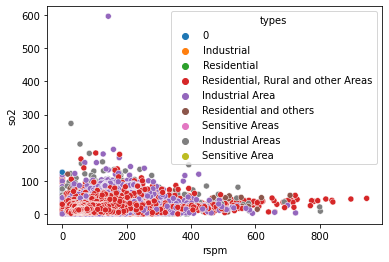

In [41]:
sns.scatterplot(x="rspm", y="so2", hue="types", data=co2_filtered)

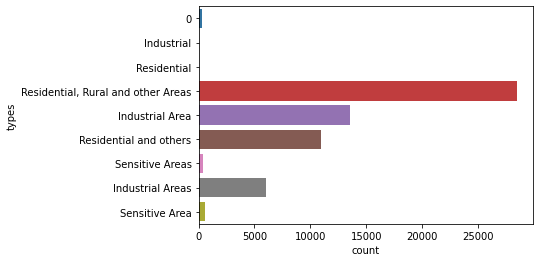

In [48]:
ax = sns.countplot(y="types", data=co2_filtered)

In [43]:
# The API of AIRQuality do not give us enough information for the analysis